# U-NET example

Example of U-NET module using tensorflow 2. The example uses the unet packages cloned from https://github.com/jakeret/unet

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import unet
from unet import utils
from unet.datasets import circles

print("TF version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.3.0
GPU is NOT AVAILABLE


In [3]:
unet_model = unet.build_model(channels=circles.channels,
                              num_classes=circles.classes,
                              layer_depth=3,
                              filters_root=16)
unet.finalize_model(unet_model)

In [4]:
train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.7, 0.3))

In [5]:
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            train_dataset,
            validation_dataset,
            epochs=5,
            batch_size=1)

Epoch 1/5
 1/70 [..............................] - ETA: 0s - loss: 0.6922 - categorical_crossentropy: 0.6922 - categorical_accuracy: 0.5880 - mean_iou: 0.2651 - dice_coefficient: 0.5007 - auc: 0.5201WARNING:tensorflow:From /opt/anaconda3/envs/exts-ml2/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
70/70 [==============================] - 18s 264ms/step - loss: 0.3256 - categorical_crossentropy: 0.3256 - categorical_accuracy: 0.9297 - mean_iou: 0.4240 - dice_coefficient: 0.8160 - auc: 0.9460 - val_loss: 0.1464 - val_categorical_crossentropy: 0.1464 - val_categorical_accuracy: 0.9530 - val_mean_iou: 0.4920 - val_dice_coefficient: 0.9072 - val_auc: 0.9918 - learning_rate: 0.0010
Epoch 2/5
70/70 [==============================] - 16s 232ms/step - loss: 0.1373 - categorical_crossentropy: 0.1373 - c

In [6]:
prediction = unet_model.predict(validation_dataset.batch(batch_size=3))

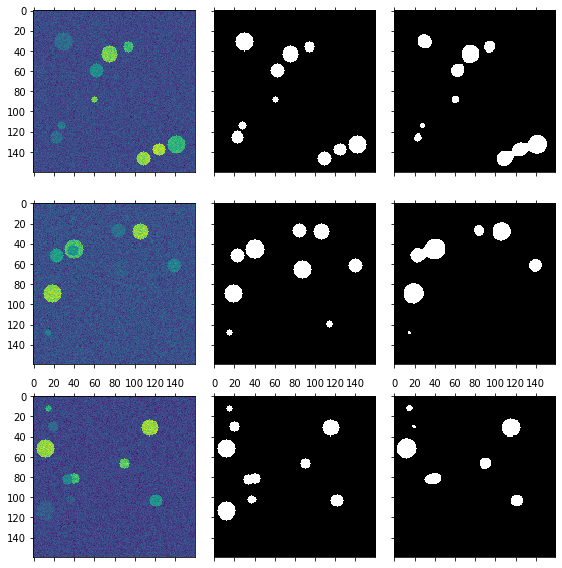

In [7]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8,8))
dataset = validation_dataset.map(utils.crop_image_and_label_to_shape(prediction.shape[1:]))

for i, (image, label) in enumerate(dataset.take(3)):
    ax[i][0].matshow(image[..., -1])
    ax[i][1].matshow(np.argmax(label, axis=-1), cmap=plt.cm.gray)
    ax[i][2].matshow(np.argmax(prediction[i,...], axis=-1), cmap=plt.cm.gray)
plt.tight_layout()